In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('/Users/summer/desktop/notebook.mplstyle');
%config InlineBackend.figure_format = 'retina'
colors = ["#2078B5", "#FF7F0F", "#2CA12C", "#D72827", "#9467BE", "#8C574B",
            "#E478C2", "#808080", "#BCBE20", "#17BED0", "#AEC8E9", "#FFBC79", 
            "#98E08B", "#FF9896", "#C6B1D6", "#C59D94", "#F8B7D3", "#C8C8C8", 
           "#DCDC8E", "#9EDAE6"]


In [2]:
def fast_fourier_transform(t,y):
    '''Return the fast Fourier transform of y.'''
    ŷ = np.fft.fft(y)
    ω = 2*np.pi*np.fft.fftfreq(len(time),time[1]-time[0])
    return ω,ŷ

In [3]:
I = 4
J = 8
F = 14

c = 10
b = 10
h = 1

dt = 0.0001
totstep = 100000

In [4]:
def lorenz96(xy,i,j):

    xy_dot[i] = (xy[0:I][(i-1)%I] * (xy[0:I][(i+1)%I] - xy[0:I][(i-2)%I]) - xy[0:I][i%I] + F - h*c/b*(np.sum([xy[I::][i::I]])))    
    xy_dot[I+j*I+i] = (c*b*xy[I:][((j+1)%J)*I+i]*(xy[I:][((j-1)%J)*I+i]-xy[I:][((j+2)%J)*I+i])-c*xy[I:][((j)%J)*I+i]+h*c/b*xy[0:I][i])

    #dx[i] = (x[(i-1)%I] * (x[(i+1)%I] - x[(i-2)%I]) - x[i%I] + F - h*c/b*(np.sum([y[jj%J,i] for jj in range(J)])))*dt     
    #dy[j,i] = (c*b*y[(j+1)%J,i]*(y[(j-1)%J,i]-y[(j+2)%J,i])-c*y[(j)%J,i]+h*c/b*x[i])*dt
    #print(i,j,xy_dot)

    return xy_dot

In [5]:
def RK4(xylist,step,i,j):
    
    oldxy = xylist[((I+J*I)*(step-1)):((I+J*I)*(step))]

    k1 = dt*lorenz96(oldxy,i,j)
    k2 = dt*lorenz96(oldxy + k1*0.5*dt,i,j)
    k3 = dt*lorenz96(oldxy + k2*0.5*dt,i,j)
    k4 = dt*lorenz96(oldxy + k3*dt,i,j)

    return oldxy + (k1 + 2*k2 + 2*k3 + k4)/6

In [6]:
x = np.random.rand(I)
y = np.random.rand(J,I)
#x= np.array([0.32312743, 0.68084138, 0.68702756, 0.87752116])
#x= np.array([0.3231274325157961, 0.6808413815594105, 0.6870275581069422, 0.8775211646916262])
#y=np.array([[0.45878852, 0.24426346, 0.17375543, 0.41534739],[0.6684705, 0.23366793, 0.27588951, 0.09632071],[0.01097495, 0.45473499, 0.6010255, 0.51196891],[0.73150277, 0.61561485, 0.88577859, 0.84420565],[0.02911555, 0.75803313, 0.77651468, 0.83750215], [0.28830338, 0.17070333, 0.0799056 , 0.20670024],[0.41379941, 0.95816018 ,0.8602284,  0.21104775], [0.56498182 ,0.91798109, 0.21188082, 0.13168289]])


xylist = np.zeros([(totstep)*(I+J*I)])
s=0

print(x)
print()
print(y)
print()

newx=[]
newlist = []
time=[0]

for ii in range(I):
    xylist[ii] = x[ii]
    #newx.append(x[ii])

newx.append([x[ii] for ii in range(len(x))])
print()
print(newx)
print()

for jjj in range(J):
    for iii in range(I):
        xylist[I + jjj*I + iii] = y[jjj,iii]
#print(xylist)

[0.06326008 0.91142414 0.031217   0.74797077]

[[0.80787422 0.01757036 0.25471359 0.71705438]
 [0.44970342 0.11031576 0.21036729 0.39723369]
 [0.32092234 0.30002213 0.96830043 0.54831415]
 [0.78609718 0.59616859 0.93746636 0.0892133 ]
 [0.05231116 0.52222906 0.79272084 0.30272251]
 [0.16777538 0.82100041 0.54720692 0.32020619]
 [0.47730776 0.1942992  0.44292907 0.12595712]
 [0.77681638 0.72640411 0.29848945 0.61548667]]


[[0.06326007914970078, 0.9114241431540494, 0.031216996094494465, 0.7479707658277304]]



In [7]:
for step in np.arange(1,totstep,1):
    
    xy_dot= np.zeros((I+J*I))
    
    for i in range(I):
        
        s+=1
        time.append(s)
        
        for j in range(J):
            
            xylist[(I+J*I)*(step):(I+J*I)*(step+1)] = RK4(xylist,step, i,j)
            
            newlist = xylist[(I+J*I)*(step):(I+J*I)*(step+1)][0:I]

        newx.append([newlist[ij] for ij in range(len(newlist))])
    
#print(xylist[-20::])
#print(time)
#print(len(time))

In [8]:
type(newx)

list

In [9]:
x1 = np.array([newx[a][0] for a in range(len(newx))])
x2 = np.array([newx[a][1] for a in range(len(newx))])
x3 = np.array([newx[a][2] for a in range(len(newx))])
x4 = np.array([newx[a][3] for a in range(len(newx))])

In [10]:
print(len(x1))

399997


In [11]:
print(len(x2))

399997


In [12]:
print(x2)

[0.91142414 0.91142414 0.91239967 ... 7.84001064 7.84001064 7.84001064]


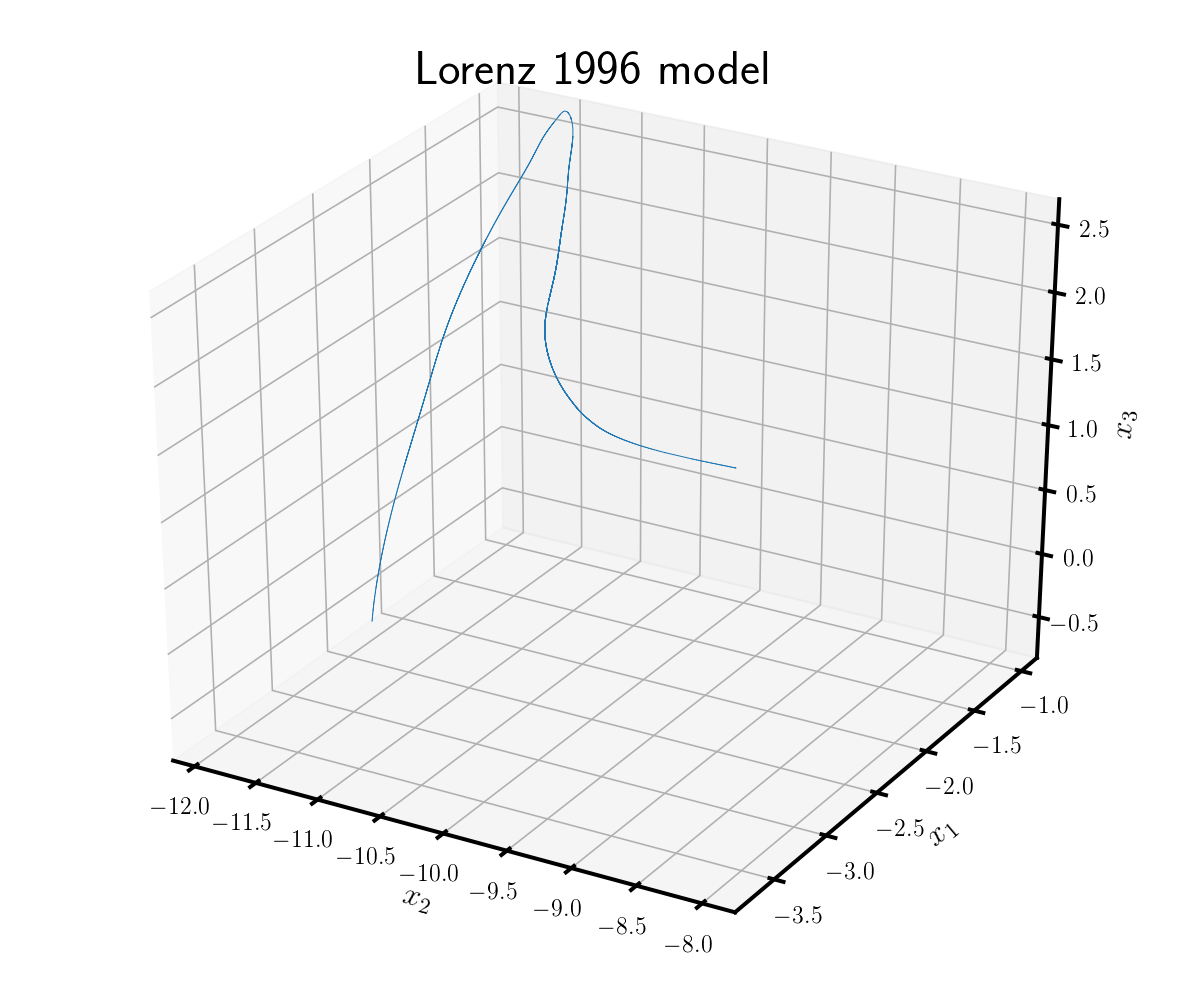

In [13]:
fig = plt.figure(figsize=(10,8))
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')
ax.plot(-x2[380000:600000], x1[380000:600000], x3[380000:600000],lw=0.5)
ax.set_xlabel("$x_2$")
ax.set_ylabel("$x_1$")
#plt.xlim(4, -12)
ax.set_zlabel("$x_3$")
ax.set_title("Lorenz 1996 model")
plt.show()

In [14]:
np.save('xlisttxt', x)
np.save('ylisttxt', y)

In [15]:
print(x)

[0.06326008 0.91142414 0.031217   0.74797077]


In [16]:
print(y)

[[0.80787422 0.01757036 0.25471359 0.71705438]
 [0.44970342 0.11031576 0.21036729 0.39723369]
 [0.32092234 0.30002213 0.96830043 0.54831415]
 [0.78609718 0.59616859 0.93746636 0.0892133 ]
 [0.05231116 0.52222906 0.79272084 0.30272251]
 [0.16777538 0.82100041 0.54720692 0.32020619]
 [0.47730776 0.1942992  0.44292907 0.12595712]
 [0.77681638 0.72640411 0.29848945 0.61548667]]


In [17]:
function [LE] = LEcalc(f,Df,param,v0,type)


m = length(v0);
N = 10000;
LE = zeros(m,1);
v = v0;

elseif strcmp(type,'ode')
    
    tstep = 0.01;
    q = eye(m);
    Jt = @(x,A) A*x; % ode for DF1, 'A' will be current Df
    
    for i=1:N
        DF1 = eye(m); % initialize derivative of time-1 map
        for j = 1:1/tstep
            % one timestep using RK4
            DF1 = stepit(Jt,DF1,Df(v,param),tstep);	% 3 x 3 matrix
            v = stepit(f,v,param,tstep);
        end
        Z = DF1*q;
        [q,r] = qr(Z);
        LE = LE + log(abs(diag(r)))/N;
    end
    %LE = LE/N;

SyntaxError: invalid syntax (<ipython-input-17-a009c2699a16>, line 9)

In [ ]:
transform = np.absolute(np.fft.fft(x1))
freq = np.fft.fftfreq(len(time),1e-5) # time step is 10 microseconds
plt.figure()
plt.plot(freq,transform)
plt.xlabel('Frenquency(Hz)')
plt.ylabel('Amplitude')
plt.title('fft')
plt.show()

In [16]:
dt = 0.001
dd = 1
n = 500
Jmax = 51
Imax = 51

In [ ]:
m = len(v0)
N = 10000
LE = np.zeros(m)
v = v0
tstep = 0.01

In [ ]:
m = len(v0)
N = 10000
LE = np.zeros(m)
v = v0
tstep = 0.01

In [ ]:
def LEcalc(f,Df,v0,i,j):

    q=np.identity(m)
    
    Jt = @(x,A) A*x
    
    for n in range(N):
        
        DF1 = np.identity(m)
          
        for j in np.arange(1,1/tstep,1):
            
            #stepit(func, x, p, step)
            DF1 = RK4(Jt,DF1,Df(v,param),tstep)
    
            v = RK4(f,v,tstep,i,j)

        Z = DF1*q
        [q,r] = np.linalg.qr(Z)
        LE = LE + np.log(np.absolute(np.diag(r)))/N
        
        #np.log(np.amax(np.absolute(np.diag(r))))/(Imax-4)

In [ ]:
fig = plt.figure(figsize=(8,5))
plt.scatter(time,x1, s=0.5, marker='.', c='black')
# title and labels
plt.ylabel(r'$x_1$')
plt.xlabel('time')
plt.title('1996 Lorenz model',fontsize=15)
plt.xlim(time[2400000],time[2850000])

frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])

plt.ylim(-10,15)
plt.show()

In [ ]:
# Get the discrete FT
ω,ŷ = fast_fourier_transform(time,x1)
print(len(time))
# Plot the real and imaginary parts of the DFT
fig = plt.figure(figsize=(8,5))
plt.loglog(ω,ŷ.real,label='real.',lw=1)
plt.loglog(ω,ŷ.imag,label='imag.',lw=1)
#plt.xlim(0,np.max(ω))
#plt.xlim(1,10**5)
#plt.ylim(-100000,100000)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Transform [arb.]')
plt.legend(loc='lower right')

In [ ]:
# Get the discrete FT
ω,ŷ = fast_fourier_transform(time,x1)

# Plot the real and imaginary parts of the DFT
fig = plt.figure(figsize=(8,5))
plt.loglog(ω,np.abs(ŷ),lw=1)
plt.xlim(10,10**3)
#plt.ylim(1,10**6)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Power [arb]')

In [ ]:
transform = np.absolute(np.fft.fft(x1))
freq = np.fft.fftfreq(len(time),1e-5) # time step is 10 microseconds
plt.figure()
plt.plot(freq,transform)
plt.xlabel('Frenquency(Hz)')
plt.ylabel('Amplitude')
plt.title('FFT')
plt.show()